## Exploration 14. MovieRecommendation 🎥🍿

<img src='https://editor.analyticsvidhya.com/uploads/76889recommender-system-for-movie-recommendation.jpg' height='750' width='750'>

### Table of Contents

### 1. Introduction

* 1.1 What is Recommender Systems?
* 1.2 Types of Recommender Systems
* 1.3 What is Matrix Factorization(MF)?
* 1.4 What is CSR(Compressed Sparse Row) Matrix?

### 2. Experiment Environment Set-up

* 2.1 Import Libraries

### 3. Load and Preprocessing Data

* 3.1 Load Data (Movielens)
* 3.2 Preprocessing Data (Movielens)
* 3.3 Load Data (Meta)
* 3.4 Preprocessing Data (Meta)
* 3.5 Data Merge (Movielens+Meta)

### 4. Merge Data Analysis

* 4.1 Year of the Most Recently Released Movie
* 4.2 Unique Number of Movies
* 4.3 Users
* 4.4 Most Popular Movies

### 5. Add My Favorite Movies

* 5.1 My Favorite 5 Movies
* 5.2 Delete Unnecessary Columns
* 5.3 Data Append Preprocessing
* 5.4 Add My Movies

### 6. Create CSR matrix

### 7. Model(als_model = AlternatingLeastSquares) Training

### 8. Preference Predicted by the Trained Model

* 8.1 My Favorite Movie
* 8.2 Not My Favorite Movie

### 9. Get Recommendations (Similar to My Favorite Movies)

### 10. Get Recommendations (Favorite Movies)

### 11. Retrospection

***

### 1. Introduction 

### 1.1 What is Recommender Systems?

인터넷의 발전으로 유저의 아이템 선호에 대한 직간접적 피드백을 얻기 쉬워졌다. 이러한 과거의 유저-아이템 간 상호작용 기록을 활용해 유저의 취향을 고려한 아이템을 추천하는 것이 추천시스템의 기본적 아이디어이다.

추천 알고리즘은 유저-아이템 간 상호작용 기록을 기반으로 개발되었는데, 아래 알고리즘이 그 예에 해당한다.
* Collaborative Filtering: 협업필터링
* Content-based Recommender Systems: 컨텐츠 기반 추천시스템
* Knowldege-based systems: 지식 기반 추천시스템

<img src = 'https://wikidocs.net/images/page/48798/overview_rs.png' height='600' width='600'>

### 1.2 Types of Recommender Systems

### 1.2.1 Collaborative Filtering Systems (협업 필터링 추천 시스템)

두 명의 사용자가 비슷한 관심사를 가지고 있다면, **한 사용자의 데이터를 바탕으로 다른 사용자에게 추천**해주는 방식. 사용자 간의 선호도를 서로 고려하여 많은 선택 사항들로부터 아이템을 걸러내거나 선택한다. 

### 1.2.2 Content-based Recommender Systems (콘텐츠 기반 추천 시스템)

아이템들과 사용자들 간의 **유사도**를 고려해서 사용자에게 아이템을 추천. **사용자가 과거에 좋아했던 아이템들과 비슷한 제품들을 추천.** 아이템간의 유사도는 다른 짝지어진 아이템들과 관련된 특징들을 통하여 계산되고 사용자들의 선호 이력에 맞게 적용한다.

ex) 사용자가 떡볶이를 시켜 먹었다고 가정, 시스템에서 떡볶이와 관련된 특징(분식, 매운 음식)을 토대로 관련된 특징을 가진 다른 음식을 추천하도록 학습

### 1.2.3 Knowldege-based Systems (지식 기반 추천 시스템)

사용자들의 구매 이력이 적은 경우에 사용. 아이템을 추천하기 전에 아이템의 특징과 명시적인 **질문을 통해 획득한 사용자 선호도와 추천 범위 등** 아이템들에 대한 정보를 고려하여 추천한다.

ex) 배달 음식 어플을 처음 사용하면 좋아하는 음식의 종류(한식, 분식 ...), 가격대, 맛(매운, 단짠단짠 ...) 와 같은 다양한 데이터를 받아서 추천

### 1.2.4 Hybrid Systems (하이브리드 시스템)

위에서 언급한 다양한 추천 시스템의 **결합**해서 만든다. 한 서비스의 단점을 다른 서비스의 **장점으로 커버**

ex) 새로운 아이템에 대한 평점이 없으면 추천 성능이 떨어지게 되는 협업 필터링과 아이템의 특징에 대한 정보를 이용할 수 있는 정보 기반 추천 시스템 결합

### 1.3 What is Matrix Factorization(MF)?

**Matrix Factorization(MF, 행렬 분해)**

* `MF` 모델은 2006년 Netflix에서 백만 달러의 상금을 걸고 개최한 자사 추천 시스템의 성능을 10% 이상 향상시키는 챌린지를 계기로 알려지게 되었다. 
* (m,n) 사이즈의 행렬 R을 (m,k) 사이즈의 행렬 P와 (k,n) 사이즈의 행렬 Q로 분해한다면,
* R이란 그저 P와 Q의 행렬곱으로 표현 가능할 수 있다는 아이디어이다. 
* 대체로 k는 m이나 n보다 훨씬 작은 값이기 때문에 계산량 측면으로도 훨씬 유리해진다. 
* 단순한 아이디어에도 불구하고 `MF` 모델은 성능이 준수하고 Scalability가 좋아서 많이 사용되는 모델이다. 

<img src = 'https://d3s0tskafalll9.cloudfront.net/media/images/E-3v2-2_ekCv9hW.max-800x600.png' height='600' width='600'>

* 모델의 목표는 모든 유저와 아이템에 대해 k-dimension의 벡터를 잘 만드는 것이다.
* 벡터를 잘 만드는 기준은 **유저 i의 벡터($U_i$)와 아이템 j의 벡터($I_j$)를 내적했을 때 유저 i가 아이템 j에 대해 평가한 수치$(M_{ij}$)와 비슷한지**이다.

$$
U_i⋅I_j=M_{ij}
$$

### 1.4 What is CSR(Compressed Sparse Row) Matrix?

**CSR(Compressed Sparse Row) Matrix**

* `CSR Matrix`는 Sparse한 matrix에서 0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보만으로 구성하여 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조이다.
* `CSR Matrix`는 data, indices, indptr 로 행렬을 압축하여 표현한다.

<img src = 'https://d3s0tskafalll9.cloudfront.net/media/images/Screen_Shot_2022-02-10_at_4.29.43_PM.max-800x600.png' height='600' width='600'>

* **data**는 0이 아닌 원소를 차례로 기입한 값
> data = [1, 2, 3, 4, 5, 6]
* **indices**는 data의 각 요소가 어느 열(column)에 있는지를 표현한 index
> indices = [0, 4, 1, 3, 0, 3]
* **indptr**은 각 행(row)에서 0이 아닌 첫 번째 원소가 data 리스트에서 의 몇 번째에 해당하는지와 마지막에 data 벡터의 길이를 추가한 값. 다만 예시의 세 번째 행처럼 0이 아닌 원소가 없는 경우엔 그 다음 행의 값과 같은 값을 넣었다.
> indptr = [0, 2, 4, 4, 6]
* 이를 통해 data[0:2]는 첫 번째 행, data[2:4]는 두 번째 행, data[4:4]는 세 번째 행, data[4:6]는 네 번째 행에 위치함을 나타낼 수 있게 된다.

### 2. Experiment Environment Set-up

### 2.1 Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

### 3. Load and Preprocessing Data

* 별점 데이터는 대표적인 explicit 데이터이다. 하지만 implicit 데이터로 간주하고 테스트해본다.
* 별점을 시청횟수로 해석해서 생각한다.
* 또한 유저가 3점 미만으로 준 데이터는 선호하지 않는다고 가정하고 제외한다.

### 3.1 Load Data (Movielens)

In [2]:
# Movielens 데이터는 rating.dat 안에 이미 인덱싱까지 완료된 사용자-영화-평점 데이터가 깔끔하게 정리되어 있다.
rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
# 1~5까지의 별점 분포 확인
rating_count = ratings.groupby(by=['ratings']).agg({'user_id': 'count'}).reset_index()
rating_count.columns = ['Rating', 'Count']

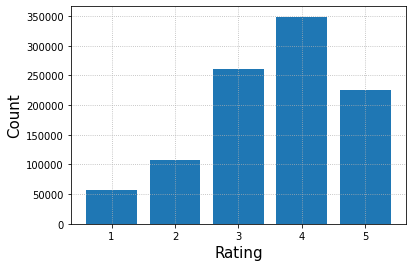

In [4]:
plt.bar(rating_count.Rating, rating_count.Count)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(ls='dotted')
plt.show()

* 대부분의 별점이 3 ~ 5점에 분포하고 있는 것을 확인할 수 있다.

### 3.2 Preprocessing Data (Movielens)

### 3.2.1 Delete Rating

In [5]:
# 3점 이상만 남긴다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


### 3.2.2 Organize Columns

In [6]:
# timestamp 컬럼을 없앤다.
del ratings['timestamp']

In [7]:
# 별점을 시청횟수로 해석할 예정이므로
# ratings 컬럼의 이름을 counts로 바꾼다.
ratings.rename(columns={'ratings':'counts'}, inplace=True)

In [8]:
# timestamp 컬럼 삭제 여부 확인
# ratings 컬럼 이름 변경 여부 확인 (ratings → counts)
ratings.head()

,user_id,movie_id,counts
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [9]:
ratings['counts']

0          5
1          3
2          3
3          4
4          5
          ..
1000203    3
1000205    5
1000206    5
1000207    4
1000208    4
Name: counts, Length: 836478, dtype: int64

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836478 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   836478 non-null  int64
 1   movie_id  836478 non-null  int64
 2   counts    836478 non-null  int64
dtypes: int64(3)
memory usage: 25.5 MB


* 전처리를 완료한 데이터에 대한 정보를 확인한다.
* 평점 1, 2점이 삭제되어 1,000,209개 였던 데이터수가 836,478개로 줄어들었다. 전체 컬럼에서 누락된 데이터는 확인되지 않는다.
* timestamp 컬럼은 삭제되었으며, ratings 컬럼 이름이 counts로 변경되었다.

### 3.3 Load Data (Meta)

In [11]:
# 영화 제목을 보기 위해 메타 데이터를 읽어온다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### 3.4 Preprocessing Data (Meta)

### 3.4.1 Change to Lowercase

In [12]:
# 검색을 쉽게하기 위해 제목 문자열을 소문자로 바꿔준다.
movies['title'] = movies['title'].str.lower()
movies.head()

,movie_id,title,genre
0,1,toy story (1995),Animation|Children's|Comedy
1,2,jumanji (1995),Adventure|Children's|Fantasy
2,3,grumpier old men (1995),Comedy|Romance
3,4,waiting to exhale (1995),Comedy|Drama
4,5,father of the bride part ii (1995),Comedy


### 3.4.2 Extract year Data

In [13]:
# 분석의 편의를 위해 title에서 연도 데이터를 따로 추출한다.
movies[['title', 'year']] = movies["title"].str.replace(pat=r'[()]', repl=r'', regex=True).str.rsplit(n=1, expand=True)
movies.head()

,movie_id,title,genre,year
0,1,toy story,Animation|Children's|Comedy,1995
1,2,jumanji,Adventure|Children's|Fantasy,1995
2,3,grumpier old men,Comedy|Romance,1995
3,4,waiting to exhale,Comedy|Drama,1995
4,5,father of the bride part ii,Comedy,1995


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
 3   year      3883 non-null   object
dtypes: int64(1), object(3)
memory usage: 121.5+ KB


* 지금까지의 전처리를 완료한 데이터에 대한 정보를 확인한다.
* `year` 정보가 따로 분리되어 컬럼이 생성된 것을 확인할 수 있다.
* 전체 컬럼에서 누락된 데이터는 확인되지 않는다.

### 3.5 Data Merge (Movielens+Meta)

In [15]:
# pandas의 merge()함수를 사용해서 'movie_id'를 기준으로 두 데이터 병합
ratings_add = pd.merge(ratings, movies, on='movie_id')
ratings_add

,user_id,movie_id,counts,title,genre,year
0,1,1193,5,one flew over the cuckoo's nest,Drama,1975
1,2,1193,5,one flew over the cuckoo's nest,Drama,1975
2,12,1193,4,one flew over the cuckoo's nest,Drama,1975
3,15,1193,4,one flew over the cuckoo's nest,Drama,1975
4,17,1193,5,one flew over the cuckoo's nest,Drama,1975
...,...,...,...,...,...,...
836473,5851,3607,5,one little indian,Comedy|Drama|Western,1973
836474,5854,3026,4,slaughterhouse,Horror,1987
836475,5854,690,3,"promise, the versprechen, das",Romance,1994
836476,5938,2909,4,"five wives, three secretaries and me",Documentary,1998


In [16]:
ratings_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836478 entries, 0 to 836477
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   836478 non-null  int64 
 1   movie_id  836478 non-null  int64 
 2   counts    836478 non-null  int64 
 3   title     836478 non-null  object
 4   genre     836478 non-null  object
 5   year      836478 non-null  object
dtypes: int64(3), object(3)
memory usage: 44.7+ MB


* 병합된 데이터에 대한 정보를 확인한다.
* `movie_id`컬럼을 기준으로 병합되었다.
* 총 6개의 컬럼과 컬럼별로 836,478개의 데이터가 있다.

### 4. Merge Data Analysis

### 4.1 Year of the Most Recently Released Movie

In [17]:
# 가장 최근에 개봉한 영화의 연도
ratings_add['year'].sort_values(ascending=False).iloc[0]

'2000'

### 4.2 Unique Number of Movies

In [18]:
# 영화 수
ratings_add['movie_id'].nunique()

3628

### 4.3 Users

### 4.3.1 Unique Number of Users

In [19]:
# 사용자 수
ratings_add['user_id'].nunique()

6039

### 4.3.2 How Many Movies

In [20]:
# 유저별 몇 편의 영화를 보는지 통계
user_count = ratings_add.groupby('user_id')['title'].count()
user_count.describe()

count    6039.000000
mean      138.512668
std       156.241599
min         1.000000
25%        38.000000
50%        81.000000
75%       177.000000
max      1968.000000
Name: title, dtype: float64

### 4.3.3 Counts by Movie

In [21]:
# 영화 별 시청(count)횟수 중앙값에 대한 통계
user_median = ratings_add.groupby('user_id')['counts'].median()
user_median.describe()

count    6039.000000
mean        4.055970
std         0.432143
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: counts, dtype: float64

### 4.4 Most Popular Movies

### 4.4.1 Number of Users

In [22]:
# 각 영화별 시청한 user들의 수
movie_user = ratings_add.groupby('title')
movie_user['user_id'].count().sort_values(ascending=False).head(30)

title
american beauty                                   3211
star wars: episode iv - a new hope                2910
star wars: episode v - the empire strikes back    2885
star wars: episode vi - return of the jedi        2716
saving private ryan                               2561
terminator 2: judgment day                        2509
silence of the lambs, the                         2498
raiders of the lost ark                           2473
back to the future                                2460
matrix, the                                       2434
jurassic park                                     2413
sixth sense, the                                  2385
fargo                                             2371
braveheart                                        2314
men in black                                      2297
schindler's list                                  2257
princess bride, the                               2252
shakespeare in love                               2213
l.a.

### 4.4.2 Top 30 Movies (by Number of Users)

Text(0.5, 1.0, 'Top 30 Movies')

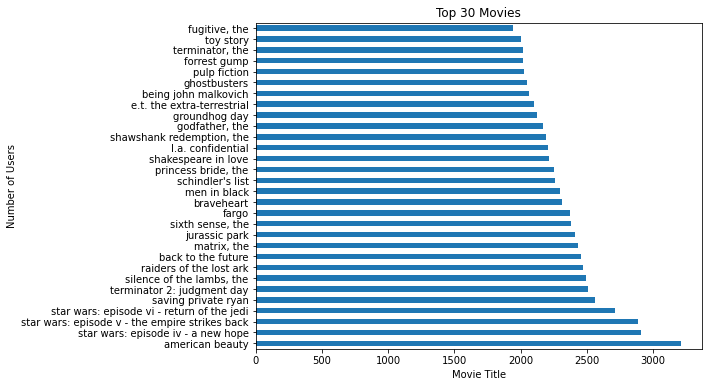

In [23]:
# 영화를 시청한 유저의 수를 바탕으로 가장 인기 있는 영화 30개 시각화
users = movie_user['user_id'].count().sort_values(ascending=False).head(30)
users.plot(kind="barh", figsize=(8,6))
plt.xlabel('Movie Title')
plt.ylabel('Number of Users')
plt.title('Top 30 Movies')

### 4.4.3 Number of Counts

In [24]:
# 시청 빈도의 합이 가장 높은 순서대로 나열
movie_count = ratings_add.groupby('title')
movie_count['counts'].sum().nlargest(30)

title
american beauty                                   14449
star wars: episode iv - a new hope                13178
star wars: episode v - the empire strikes back    12648
saving private ryan                               11348
star wars: episode vi - return of the jedi        11303
raiders of the lost ark                           11179
silence of the lambs, the                         11096
matrix, the                                       10903
sixth sense, the                                  10703
terminator 2: judgment day                        10513
fargo                                             10465
schindler's list                                  10317
braveheart                                        10125
shawshank redemption, the                         10085
back to the future                                10081
godfather, the                                     9965
princess bride, the                                9866
jurassic park                             

### 4.4.4 Top 30 Movies (by Number of Counts)

Text(0.5, 1.0, 'Top 30 Movies')

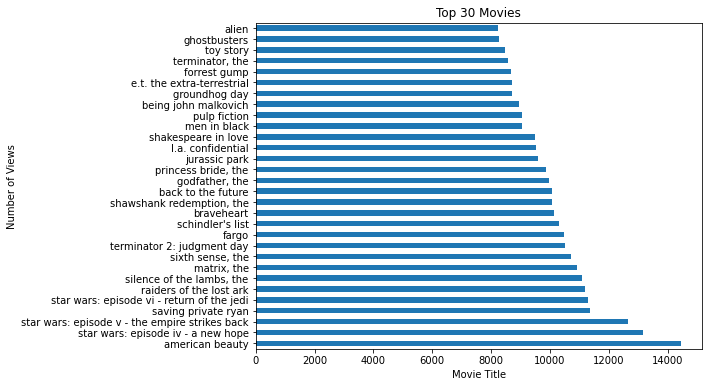

In [25]:
# 영화를 시청 빈도 수를 바탕으로 가장 인기 있는 영화 30개 시각화
pop = movie_count['counts'].sum().nlargest(30)
pop.plot(kind="barh", figsize=(8,6))
plt.xlabel('Movie Title')
plt.ylabel('Number of Views')
plt.title('Top 30 Movies')

* `인기가 많은 영화`는 `영화를 시청한 유저의 수 (Number of Users)` 또는 `영화가 시청된 횟수 (Number of Counts)`를 기준으로 생각해 볼 수 있다.
* 한 영화를 1명이 5번 시청한 것과 5명이 1번씩 시청한 것은 같다고 볼 수 없을 것이다.
* 상식적으로 인기가 많은 영화는 대체적으로 잘 알려졌고 많은 사람들에게 평가받았을 확률이 높다. 
* 따라서, 두 데이터(`영화를 시청한 유저의 수 (Number of Users)`, `영화가 시청된 횟수 (Number of Counts)`)를 같이 고려해본다.

In [26]:
# 두 데이터를 묶어 비교해본다.
users_2 = movie_user['user_id'].count().sort_values(ascending=False)
pop_2 = movie_count['counts'].sum().sort_values(ascending=False)
user_view = pd.merge(pop_2, users_2, on='title')

In [27]:
user_view.rename(columns={'counts':'views'}, inplace=True)
user_view.rename(columns={'user_id':'number of users'}, inplace=True)
user_view

,views,number of users
title,,
american beauty,14449,3211
star wars: episode iv - a new hope,13178,2910
star wars: episode v - the empire strikes back,12648,2885
saving private ryan,11348,2561
star wars: episode vi - return of the jedi,11303,2716
...,...,...
"last of the high kings, the a.k.a. summer fling",3,1
tough and deadly,3,1
"sunchaser, the",3,1


<Figure size 576x432 with 0 Axes>

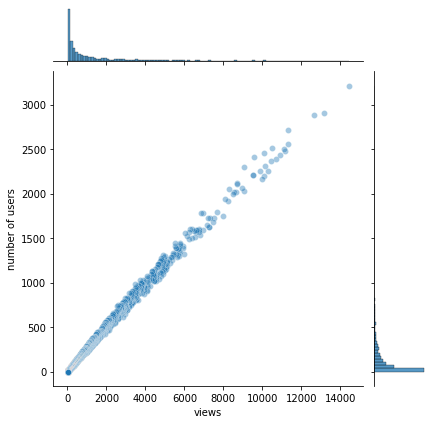

In [28]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='views', y='number of users', data=user_view, alpha=0.4)

* 두 데이터의 상관관계가 굉장히 높은 것을 확인할 수 있다.
* 따라서, 둘 중 한 데이터를 가지고 인기를 확인하는데 문제가 없다고 판단할 수 있다.

### 5. Add My Favorite Movies

### 5.1 My Favorite 5 Movies

In [29]:
movies[movies['title'].str.lower().str.contains('silence of the lambs', regex=False)]

,movie_id,title,genre,year
589,593,"silence of the lambs, the",Drama|Thriller,1991


In [30]:
movies[movies['title'].str.lower().str.contains('se7en', regex=False)]

,movie_id,title,genre,year
46,47,seven se7en,Crime|Thriller,1995


In [31]:
movies[movies['title'].str.lower().str.contains('sixth sense', regex=False)]

,movie_id,title,genre,year
2693,2762,"sixth sense, the",Thriller,1999


In [32]:
movies[movies['title'].str.lower().str.contains('fight club', regex=False)]

,movie_id,title,genre,year
2890,2959,fight club,Drama,1999


In [33]:
movies[movies['title'].str.lower().str.contains('matrix', regex=False)]

,movie_id,title,genre,year
2502,2571,"matrix, the",Action|Sci-Fi|Thriller,1999


### 5.2 Delete Unnecessary Columns

In [34]:
# genre, year 컬럼 삭제
del ratings_add['genre']
del ratings_add['year']

ratings_add

,user_id,movie_id,counts,title
0,1,1193,5,one flew over the cuckoo's nest
1,2,1193,5,one flew over the cuckoo's nest
2,12,1193,4,one flew over the cuckoo's nest
3,15,1193,4,one flew over the cuckoo's nest
4,17,1193,5,one flew over the cuckoo's nest
...,...,...,...,...
836473,5851,3607,5,one little indian
836474,5854,3026,4,slaughterhouse
836475,5854,690,3,"promise, the versprechen, das"
836476,5938,2909,4,"five wives, three secretaries and me"


### 5.3 Data Append Preprocessing

In [35]:
# 내가 좋아하는 영화 5개
my_favorite = ['silence of the lambs, the', 'seven se7en', 'sixth sense, the', 'fight club', 'matrix, the']
# 내가 좋아하는 영화의 movie_id
my_favorite_id = [593, 47, 2762, 2959, 2571]
# 새로운 user의 id
new_userid = ['mj']

# 유저 id, 영화 제목, 시청횟수
my_rating = pd.DataFrame({'user_id' : new_userid * 5, 'movie_id' : my_favorite_id, 'counts' : [4, 5, 5, 5, 5], 'title' : my_favorite})
my_rating

,user_id,movie_id,counts,title
0,mj,593,4,"silence of the lambs, the"
1,mj,47,5,seven se7en
2,mj,2762,5,"sixth sense, the"
3,mj,2959,5,fight club
4,mj,2571,5,"matrix, the"


### 5.4 Add My Movies

In [36]:
# 내가 선호하는 영화 5가지 정보 붙이기
ratings_add = ratings_add.append(my_rating)
ratings_add.tail(10)

,user_id,movie_id,counts,title
836473,5851,3607,5,one little indian
836474,5854,3026,4,slaughterhouse
836475,5854,690,3,"promise, the versprechen, das"
836476,5938,2909,4,"five wives, three secretaries and me"
836477,5948,1360,5,identification of a woman identificazione di u...
0,mj,593,4,"silence of the lambs, the"
1,mj,47,5,seven se7en
2,mj,2762,5,"sixth sense, the"
3,mj,2959,5,fight club
4,mj,2571,5,"matrix, the"


### 6. Create CSR matrix

In [37]:
# 고유한 유저, 영화를 찾아내는 코드
user_unique = ratings_add['user_id'].unique()
movie_unique = ratings_add['title'].unique()

# 유저, 영화를 indexing 하는 코드. idx는 index의 약자
user_to_idx = {v:k for k,v in enumerate(user_unique)}
movie_to_idx = {v:k for k,v in enumerate(movie_unique)}

* user_unique: 유저의 수
* movie_unique: 영화의 갯수
* 유저 id와 영화 제목을 고유한 갯수만큼 indexing

In [38]:
# 인덱싱이 잘 되었는지 확인
print(user_to_idx['mj'])    # 6040명의 유저 중 마지막으로 추가된 유저이니 6039가 나와야 한다. 
print(movie_to_idx['seven se7en'])

6039
220


In [39]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 본다.
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거한다. 
temp_user_data = ratings_add['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(ratings_add):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    ratings_add['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해준다. 
else:
    print('user_id column indexing Fail!!')

# movie_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱한다. 
temp_movie_data = ratings_add['title'].map(movie_to_idx.get).dropna()
if len(temp_movie_data) == len(ratings_add):
    print('title column indexing OK!!')
    ratings_add['title'] = temp_movie_data
else:
    print('title column indexing Fail!!')

ratings_add

user_id column indexing OK!!
title column indexing OK!!


,user_id,movie_id,counts,title
0,0,1193,5,0
1,1,1193,5,0
2,2,1193,4,0
3,3,1193,4,0
4,4,1193,5,0
...,...,...,...,...
0,6039,593,4,121
1,6039,47,5,220
2,6039,2762,5,38
3,6039,2959,5,273


* data column 값을 indexing 값으로 교체
* user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱
* movie_to_idx을 통해 title 컬럼도 동일한 방식으로 인덱싱

In [40]:
num_user = ratings_add['user_id'].nunique()
num_movie = ratings_add['title'].nunique()

csr_data = csr_matrix((ratings_add.counts, (ratings_add.user_id, ratings_add.title)), shape= (num_user, num_movie))
csr_data

<6040x3586 sparse matrix of type '<class 'numpy.int64'>'
	with 834213 stored elements in Compressed Sparse Row format>

### 7. Model(als_model = AlternatingLeastSquares) Training

In [41]:
# implicit 라이브러리에서 권장하고 있는 부분. 학습 내용과는 무관하다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [42]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [43]:
# als 모델은 input으로 item X user 꼴의 matrix를 받기 때문에 Transpose해준다. (행렬곱 연산)
csr_data_transpose = csr_data.T
csr_data_transpose

<3586x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 834213 stored elements in Compressed Sparse Column format>

In [44]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

### 8. Preference Predicted by the Trained Model

* model을 이용하여 나의 벡터와 영화 벡터를 구한다.
* 내가 선호하는 영화(seven)와 선호 리스트에 없는 영화(godfather)의 벡터를 계산해 비교해본다.

### 8.1 My Favorite Movie

In [45]:
mj, se7en = user_to_idx['mj'], movie_to_idx['seven se7en']
mj_vector, se7en_vector = als_model.user_factors[mj], als_model.item_factors[se7en]

In [46]:
# 나의 벡터
mj_vector

array([ 0.48173556, -0.14442107, -0.4442842 , -0.24061742,  0.22410035,
       -0.21958143, -0.51620555, -0.19737498,  0.2650092 ,  0.5265553 ,
       -0.30797353,  0.78150326, -0.02095373, -0.14865068,  0.02001044,
       -0.23728333,  0.69246477,  0.00830308,  0.4725934 ,  1.0253422 ,
       -0.20773399, -0.8542213 ,  0.75041515, -0.7158263 ,  0.05439601,
       -0.2863807 ,  0.7013089 , -0.18866596, -0.5078014 , -0.77219075,
       -0.56283987, -0.1972529 ,  0.38264582,  0.5398723 , -0.51748884,
        0.20401233, -0.14160767, -0.06625241, -0.03293229, -0.29385716,
        0.5014702 ,  0.44223714,  1.0519953 , -0.41882536, -0.5754148 ,
        0.3250834 ,  0.10086742, -0.36874792, -0.08498746,  0.3059473 ,
        1.0098597 ,  0.23619683,  0.2946272 , -0.9929341 , -0.8559788 ,
        0.13099502,  0.3625398 ,  0.4423906 , -0.17344229,  0.39181834,
        0.3641931 ,  0.21478352,  0.66652304,  0.52950156,  0.3254421 ,
       -0.57151484, -0.56967413,  0.12935409, -1.0096629 , -0.52

In [47]:
# 영화 벡터
se7en_vector

array([ 0.02310537, -0.00338841,  0.02389567,  0.01775168,  0.00098187,
       -0.01080042,  0.00921595, -0.00241644,  0.01933544,  0.00951943,
       -0.01457715,  0.03460276, -0.0091477 ,  0.00136628, -0.0012719 ,
       -0.00465814,  0.01588145,  0.0160749 ,  0.01082637,  0.01438681,
       -0.00568538, -0.00255007,  0.01494033, -0.01088815,  0.00638323,
       -0.00075368,  0.00577525,  0.01285067, -0.01043795, -0.00325631,
       -0.01154234,  0.01753259, -0.00137952,  0.00581206,  0.00517479,
        0.01916591,  0.0010244 , -0.0080434 , -0.00414785,  0.01572289,
        0.0043545 ,  0.02786227,  0.01378566,  0.00130668, -0.00312859,
       -0.0005816 ,  0.02305298, -0.00037796,  0.00550752, -0.00282461,
        0.02905129,  0.00400773, -0.00767001, -0.00569523, -0.01960374,
        0.01873208,  0.00695017,  0.01670563, -0.00350633,  0.0295751 ,
       -0.02016102,  0.01029124,  0.03892608,  0.01175869,  0.02843239,
       -0.01226844, -0.00017415,  0.02769531, -0.00734543, -0.00

In [48]:
# mj와 se7en을 내적하는 코드
np.dot(mj_vector, se7en_vector)

0.51300794

### 8.2 Not My Favorite Movie

In [49]:
godfather = movie_to_idx['godfather, the']
godfather_vector = als_model.item_factors[godfather]
np.dot(mj_vector, godfather_vector)

-0.022158884

* 내가 선호하는 영화의 내적 값은 0.51로 비교적 높은 값을 보이고,
* 선호 리스트에 없는 영화의 내적 값은 -0.02으로 비교적 낮은 값이 출력되는 것을 확인할 수 있다.

### 9. Get Recommendations (Similar to My Favorite Movies)

* 내가 좋아하는 영화 벡터를 이용하여, input으로 주어진 영화와 비슷한 영화를 총 15개 출력

In [50]:
favorite_movie = 'sixth sense, the'
movie_title = movie_to_idx[favorite_movie]
similar_movie = als_model.similar_items(movie_title, N=15)
similar_movie 

[(38, 0.9999998),
 (121, 0.49514106),
 (233, 0.469901),
 (792, 0.41314408),
 (220, 0.39167386),
 (3549, 0.38770354),
 (243, 0.38366485),
 (51, 0.3823663),
 (273, 0.37427172),
 (170, 0.35502964),
 (2531, 0.35091525),
 (3493, 0.3425057),
 (1916, 0.34130937),
 (141, 0.34077668),
 (124, 0.33345592)]

In [51]:
# movie_to_idx 를 뒤집어, index로부터 movie 이름을 얻는 dict를 생성한다.
idx_to_movie = {v:k for k,v in movie_to_idx.items()}
[idx_to_movie[i[0]] for i in similar_movie]

['sixth sense, the',
 'silence of the lambs, the',
 'usual suspects, the',
 'bone collector, the',
 'seven se7en',
 "heaven's burning",
 'ghostbusters',
 'fargo',
 'fight club',
 'being john malkovich',
 'flawless',
 'project moon base',
 'superstar',
 'fugitive, the',
 'matrix, the']

* index 값을 이용하여 영화의 이름을 출력

In [52]:
def get_similar_movie(movie_name: str):
    movie_title = movie_to_idx[movie_name]
    similar_movie = als_model.similar_items(movie_title)
    similar_movie = [idx_to_movie[i[0]] for i in similar_movie]
    return similar_movie

* 앞서 작성한 코드인, 내가 선호하는 영화와 비슷한 영화를 추천해주는 함수
* 함수 내부에서 index 값을 이용하여 input으로 주어진 영화와 비슷한 영화의 제목 출력

* `양들의 침묵`과 비슷한 영화

In [53]:
get_similar_movie('silence of the lambs, the')

['silence of the lambs, the',
 'shawshank redemption, the',
 'fargo',
 'pulp fiction',
 'goodfellas',
 "schindler's list",
 'usual suspects, the',
 'sling blade',
 'sixth sense, the',
 'good will hunting']

* `파이트 클럽`과 비슷한 영화

In [54]:
get_similar_movie('fight club')

['fight club',
 'eyes wide shut',
 'man on the moon',
 'boiler room',
 'american history x',
 'bringing out the dead',
 'messenger: the story of joan of arc, the',
 'sixth sense, the',
 "boys don't cry",
 'eraserhead']

### 10. Get Recommendations (Favorite Movies)

* 나의 벡터를 이용하여, 내가 선호하는 영화들과 비슷한 영화들 추천받기

In [55]:
user = user_to_idx['mj']

movie_recommended = als_model.recommend(user, csr_data, N=15, filter_already_liked_items=True)
movie_recommended

[(233, 0.48502973),
 (92, 0.43293467),
 (51, 0.42285532),
 (222, 0.40724882),
 (289, 0.37986898),
 (157, 0.3411256),
 (141, 0.30125314),
 (471, 0.2898241),
 (81, 0.28047615),
 (200, 0.26896447),
 (248, 0.24857387),
 (372, 0.23546138),
 (62, 0.2300835),
 (99, 0.2217252),
 (269, 0.21945587)]

* 추천받은 영화들을 index 값으로 반환

In [56]:
[idx_to_movie[i[0]] for i in movie_recommended]

['usual suspects, the',
 'terminator 2: judgment day',
 'fargo',
 'pulp fiction',
 'reservoir dogs',
 'shawshank redemption, the',
 'fugitive, the',
 'sling blade',
 'green mile, the',
 'terminator, the',
 'good will hunting',
 'x-men',
 'total recall',
 'american beauty',
 'goodfellas']

* 사용자의 선호 영화 리스트에 있는 영화들이 영화 추천에 어느정도 기여했는지 기여도 확인

In [57]:
# 왜 나에게 american beauty를 추천해줬을까?
american_beauty = movie_to_idx['american beauty']
explain = als_model.explain(user, csr_data, itemid=american_beauty)

In [58]:
[(idx_to_movie[i[0]], i[1]) for i in explain[1]]

[('silence of the lambs, the', 0.10353576721301258),
 ('fight club', 0.08605739279199809),
 ('sixth sense, the', 0.08157546500394625),
 ('matrix, the', -0.006500777147630445),
 ('seven se7en', -0.049926287204732134)]

* 'american beauty'에 대한 기여도를 확인한 결과, 'silence of the lambs, the'가 0.103 정도로 꽤 높은 기여를 함

In [61]:
# 왜 나에게 star wars를 추천해줬을까?
star_wars = movie_to_idx['usual suspects, the']
explain = als_model.explain(user, csr_data, itemid=star_wars)

In [62]:
[(idx_to_movie[i[0]], i[1]) for i in explain[1]]

[('seven se7en', 0.16981737303956496),
 ('sixth sense, the', 0.13371977429658755),
 ('silence of the lambs, the', 0.13313033894103896),
 ('matrix, the', 0.03494568089932704),
 ('fight club', 0.004926966160653684)]

* 'usual suspects, the'에 대한 기여도를 확인한 결과, 'seven se7en'가 0.169 정도로 꽤 높은 기여를 함

### 11. Retrospection

### 11.1 What was difficult

* LMS를 참고한 덕분에 큰 어려움 없이 진행할 수 있었다.

### 11.2 What I found out

* Matrix Factorization(MF)와 CSR(Compressed Sparse Row) Matrix에 대한 이해
* `merge()` 함수 사용

### 11.3 What I want to know more about

* 행렬 계산에 대한 공부가 더 필요할 듯하다. 😂
* 추천이 잘 되었는지에 대한 객관적인 판단 지표에 대한 공부를 하면 더 나은 해석이 될 듯하다.

### 11.4 Self-Resolution

* data의 경우, 평점과 제목이 2개의 파일로 나눠져 있었다. 평점과 영화 제목의 경우, 많이 사용하는 데이터이기 때문에, merge를 이용하여 두 개의 dataframe을 하나로 합쳐서 사용하였다.
* 결과를 보면, 선호 영화 리스트에 있는 `seven`의 벡터 내적 값은 약 0.51로, 나름 높은 값을 얻었고, `godfather`라는 영화와의 벡터 내적 값은 약 -0.02정도로 굉장히 낮은 값을 얻었다.
* `godfather`도 개인적으로 좋아하는 영화이기에 추천 시스템의 신뢰도가 조금 낮다고 볼 수 있을 것 같다.
* 이번 노드에서는 추천 시스템이 단순히 5개의 영화와 시청 횟수로만 나의 취향 반영되었기에 추천시스템이 신뢰할만한 결과를 내지 못하는 것은 당연한 결과처럼 느껴진다.
* 또한 나처럼 연애, 로맨스를 제외한 장르면 상관이 없는 (다양한 장르를 선호하는) 사람의 경우에는 '좋아하는 것이 어떤 것이다.'라고 명확하게 정의내리지 못하므로 좀 더 어려울 수도 있을 것 같다.
* 사람 마음에 꼭 들게 추천하는 것은 참 어려운 일인 것 같다.

**[References]**

* https://wikidocs.net/48798
* http://melonicedlatte.com/datascience/2019/01/26/190736.html